<a href="https://colab.research.google.com/github/rajasreekalli/Data-Visualization/blob/main/New_Challenge(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
# 2) Brief description of data

df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
df.duplicated().any()

False

In [5]:
print('Missing data:\n', df.isna().sum())
print('\n')
print('Duplicates:', df.duplicated().sum())

Missing data:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Duplicates: 0


In [6]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [7]:
corr = df.corr()

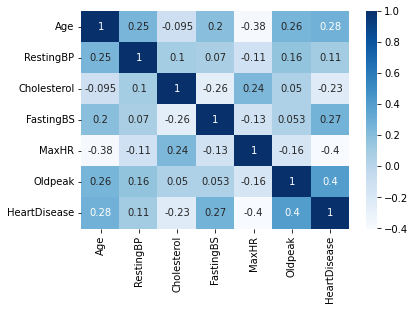

In [8]:
import seaborn as sns
sns.heatmap(corr, cmap = 'Blues', annot = True);

In [9]:
# 3) What is the target?

X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [11]:
# 4) Is this a classification or regression problem?

This is a clasiification problem.

In [12]:
cat_sel = make_column_selector(dtype_include='object')

In [13]:
cat_data = X_train[cat_sel(X_train)]
cat_data

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
853,M,NAP,LVH,N,Up
110,F,ATA,Normal,N,Flat
137,M,ATA,ST,N,Up
325,M,ASY,Normal,Y,Down
891,F,NAP,LVH,N,Flat
...,...,...,...,...,...
855,M,NAP,LVH,Y,Flat
871,M,NAP,Normal,Y,Flat
835,M,ASY,Normal,Y,Flat
792,M,NAP,Normal,N,Flat


In [14]:
On_encode = OneHotEncoder(sparse = False,handle_unknown = 'ignore')
On_encode.fit(cat_data)
cat_on = On_encode.transform(cat_data)

In [15]:
cat_on

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [16]:
pd.DataFrame(cat_on,columns=On_encode.get_feature_names(cat_data.columns))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
684,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
685,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
686,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [17]:
ohe_tuple = (On_encode,cat_sel)

In [19]:
from sklearn.compose import make_column_transformer
column_transformer = make_column_transformer(ohe_tuple)

In [20]:
column_transformer.fit(X_train)

ColumnTransformer(transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7babffedd0>)])

In [21]:
X_train_process = column_transformer.transform(X_train)
X_test_process = column_transformer.transform(X_test)

In [22]:
X_train.shape

(688, 11)

In [23]:
y_train.shape

(688,)

In [24]:
reg = LinearRegression()

In [27]:
reg.fit(X_train_process,y_train)

LinearRegression()

In [28]:
train_score = reg.score(X_train_process,y_train)
train_score

0.5595330391945805

In [29]:
test_score = reg.score(X_test_process,y_test)
test_score

0.4433890016640205

In [38]:
# 7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?

I anticipate the cleaning is the main challenge in any dataset. So next one i predict the Modeling followed by exploring.